In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
import re
import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import mean_squared_error


In [2]:

from afinn import Afinn
afinn = Afinn()


In [3]:
df = pd.read_csv('/Users/varsha/.spyder-py3/Heller.csv')

df.head(3)

,tweet,Created-At,From-User,Retweet-Count,Account,Id
0,Democratic Coalition on Twitter: &quot;Three V...,2018-10-23 15:53:39,Democratic Coalition,43.0,Heller,1.054823e+18
1,Democratic Coalition on Twitter: &quot;Three V...,2018-10-23 15:53:39,Democratic Coalition,43.0,Heller,1.054823e+18
2,Human Rights Campaign on Twitter: &quot;FACT: ...,2018-10-22 21:30:00,Human Rights Campaign,36.0,Heller,1.054545e+18


In [4]:
# Sentiment analysis with AFINN
afinn = Afinn(emoticons=True)
afinn_scores = [afinn.score(text) for text in df.tweet]
df['afinn'] = afinn_scores


In [5]:

#compute sentiment scores (polarity) and labels
sentiment_scores = [afinn.score(text) for text in df.tweet]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]


In [6]:
df1 = pd.DataFrame([list(df['tweet']), sentiment_scores, sentiment_category]).T
df1.columns = ['tweet', 'sentiment_scores', 'sentiment_category']
df1['sentiment_scores'] = df1.sentiment_scores.astype('float')
df1.groupby(by=['tweet']).describe()


sentiment_scores        \
                                                              count  mean   
tweet                                                                       
2020 Vision on Twitter: &quot;Thanks for the re...              1.0   3.0   
???????? on Twitter: &quot;[watching an ad for ...              1.0   1.0   
@1Republic14Star: @mviser @DeanHeller - Businss...              1.0  -5.0   
@1personamerican: @Trump_MAGA45 @BBudd8 @realst...              1.0   0.0   
@AltDIA @DeanHeller My wall. No drying paint, j...              1.0  -1.0   
@AltDIA @DeanHeller Oh you meant them.                          1.0   0.0   
@BarbBartter @DeanHeller @realDonaldTrump @Rose...              1.0  10.0   
@BlondeMamaUSA_: Nevada???????????? vote for @D...              1.0  -1.0   
@BodyBySteph: Great #MAGA TRUMP Ralley today in...              1.0   7.0   
@CarolForden: @mviser @DeanHeller remembers his...              5.0   1.0   
@DeanHeller @realDonaldTrump You singlehandedly...              1.0  -2.0   
@DeanHeller Con artist.                                         1.0   0.0   
@DeanHeller Dude, CUT with the hypocrisy .                      1.0  -1.0   
@DeanHeller Enjoy it, hopefully it will be your...              1.0   4.0   
@DeanHeller Exactly why we are voting you out                   1.0   0.0   
@DeanHeller No kidding.  That’s why we’re not v...              1.0  -1.0   
@DeanHeller No. Let's let the NRA decide that a...              1.0  -1.0   
@DeanHeller What are y'all watching?                            1.0   0.0   
@DeanHeller Why not? You have!                                  1.0   0.0   
@DeanHeller Your bonded teeth make you look wei...              1.0   0.0   
@DeanHeller You’re going down traitor.                          1.0   0.0   
@DeanHeller just voted! #TurnNevadaRed                          1.0   0.0   
@DeanHeller: And the Carter Administration was ...              1.0   2.0   
@DeanHeller: Don’t let outside groups and mega ...              8.0   3.0   
@DeanHeller: During the Obama years we were tol...              3.0   2.0   
@DeanHeller: I always love the drive to Elko, b...              3.0   3.0   
@DeanHeller: It's been a privilege to welcome P...              7.0   1.0   
@DeanHeller: Just got off Air Force One with Ly...              2.0   0.0   
@DeanHeller: Just left the Pahrump Valley Senio...              1.0   6.0   
@DeanHeller: Looking forward to welcoming Presi...              1.0   0.0   
...                                                             ...   ...   
Neal K on Twitter: &quot;Vote, @RosenForNevada,...              1.0   0.0   
Raw Story on Twitter: &quot;He just came out&#1...              1.0   2.0   
Rochelle Swanson on Twitter: &quot;I was there!...              1.0  11.0   
Ryan McKinnell on Twitter: &quot;No. I don&#39;...              1.0  -4.0   
S.Doyle on Twitter: &quot;Interesting news from...              1.0   2.0   
SM on Twitter: &quot;When Trump bragged he was ...              1.0  -2.0   
Senator Jeff Merkley on Twitter: &quot;Republic...              1.0   0.0   
Shameful! @DeanHeller                                           1.0  -2.0   
Soccer Thoughts on Twitter: &quot;We will take ...              1.0   4.0   
Steven Buckley on Twitter: &quot;The ACA didn&#...              1.0   3.0   
Stix N Twigs on Twitter: &quot;With 19 days rem...              1.0   2.0   
Tatiana Wright on Twitter: &quot;Why in the Wor...              1.0   4.0   
Team Dean on Twitter: &quot;&quot;My heart is r...              1.0   0.0   
Team Dean on Twitter: &quot;The difference betw...              1.0   0.0   
Team Dean on Twitter: &quot;▶️ Watch to see why...              1.0  -1.0   
Terry Reich on Twitter: &quot;Seriously? You &a...              1.0  -8.0   
The Culinary Union on Twitter: &quot;Phonebank?...              1.0   0.0   
Tiffany Jones on Twitter: &quot;Thank you!!!… h...              1.0   2.0   
Tim on Twitter: &quot;Yeah, but in 2012 @DeanHe

In [7]:

#function for tokenizing summary
regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText

cluster = df1.groupby("sentiment_scores")["tweet"].apply(list)
cluster = pd.DataFrame(cluster)
cluster.to_csv("cluster.csv")
cluster1 = pd.read_csv("cluster.csv")
cluster1["TextClean"] = cluster1["tweet"].apply(cleanReviews)



In [8]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


In [9]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords = stopwords,
        max_words=500,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
        

In [10]:
df1["sentiment_category"].describe()

count         392
unique          3
top       neutral
freq          145
Name: sentiment_category, dtype: object

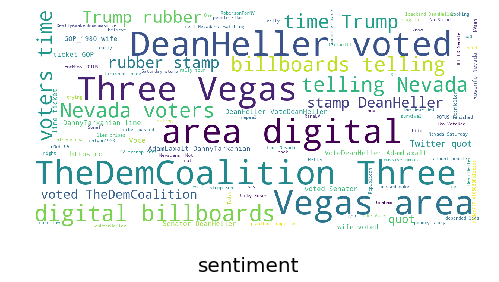

In [11]:
#Wordcloud on unclean data       
#category 0
show_wordcloud(cluster['tweet'][0], title ="sentiment")    
    

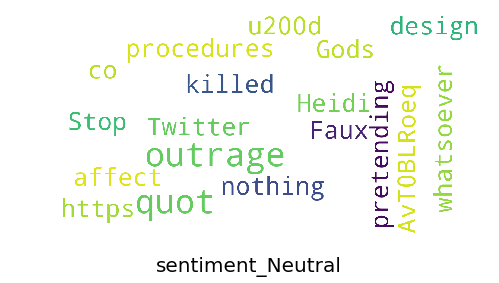

In [12]:
#Wordcloud on cleaned data      
#category 0
show_wordcloud(cluster1['tweet'][0], title ="sentiment_Neutral")    
    

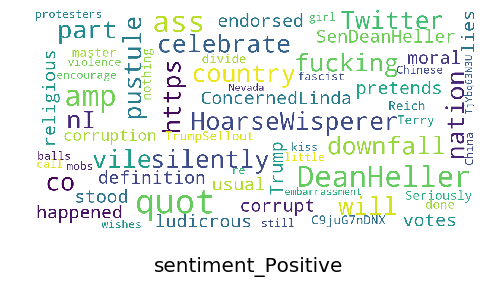

In [13]:
show_wordcloud(cluster1['tweet'][1], title ="sentiment_Positive")    
    

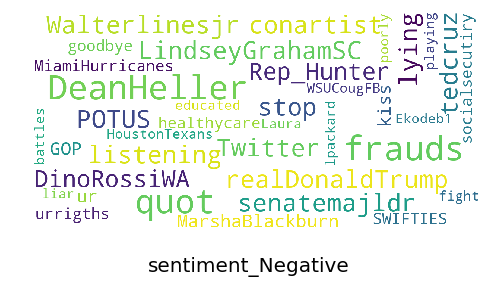

In [14]:
show_wordcloud(cluster1['tweet'][2], title ="sentiment_Negative")    
    

In [15]:
df1["sentiment_category"].unique()

array(['positive', 'negative', 'neutral'], dtype=object)